In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


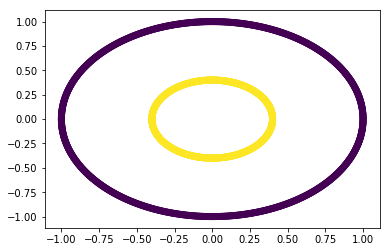

In [4]:
from sklearn.datasets import make_circles

X,y  = make_circles(n_samples = 2000,factor = 0.4)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([1000, 1000], dtype=int64))

In [6]:
#now we have to convert 0 ->[1,0] and 1 ->[0,1] means into matrix
Y = np_utils.to_categorical(y)
print(Y.shape)
print(Y[:10])

(2000, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1500, 2) (500, 2)
(1500, 2) (500, 2)


In [8]:
model = Sequential () # Lto R

model.add(Dense(5,input_shape=(2,))) # hidden layer

model.add(Activation('relu')) # till now this dense function is linear, so we will pass relu

model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy']) #similiar to sgd, in case of regression we will use mean squared error


In [11]:
model.fit(X_train,y_train,batch_size=16,
          epochs = 20,
          verbose = 2,
          validation_data=(X_test,y_test))  # 1 epoch --> 1000/100 = 10 times iteration = 1 epoch, 50 epoch means we are seeing the training data 50 times
                                            # means it will give details)
                                            # after 16 it will update the gradient, 1 batch completion is 1 epochs
                                            # less batch zise means theta updates faster, downside is that its loss fluctuates
                                            # high batch size means loss less fluctuates, and downside means theta less baar updates

Instructions for updating:
Use tf.cast instead.
Train on 1500 samples, validate on 500 samples
Epoch 1/20
 - 4s - loss: 0.6727 - acc: 0.5280 - val_loss: 0.6652 - val_acc: 0.4860
Epoch 2/20
 - 0s - loss: 0.6421 - acc: 0.5420 - val_loss: 0.6402 - val_acc: 0.5080
Epoch 3/20
 - 0s - loss: 0.6156 - acc: 0.5840 - val_loss: 0.6146 - val_acc: 0.5960
Epoch 4/20
 - 0s - loss: 0.5889 - acc: 0.6887 - val_loss: 0.5909 - val_acc: 0.6720
Epoch 5/20
 - 0s - loss: 0.5651 - acc: 0.7660 - val_loss: 0.5689 - val_acc: 0.7540
Epoch 6/20
 - 0s - loss: 0.5420 - acc: 0.8640 - val_loss: 0.5470 - val_acc: 0.8660
Epoch 7/20
 - 0s - loss: 0.5189 - acc: 0.8747 - val_loss: 0.5245 - val_acc: 0.8700
Epoch 8/20
 - 0s - loss: 0.4952 - acc: 0.8767 - val_loss: 0.5008 - val_acc: 0.8740
Epoch 9/20
 - 0s - loss: 0.4702 - acc: 0.8813 - val_loss: 0.4747 - val_acc: 0.8760
Epoch 10/20
 - 0s - loss: 0.4435 - acc: 0.8860 - val_loss: 0.4462 - val_acc: 0.9000
Epoch 11/20
 - 0s - loss: 0.4145 - acc: 0.9420 - val_loss: 0.4154 - val_ac

In [ ]:
## adding hidden layers, we are increasing the comolexity of decison layers and no of neurons we are increasing the no of decison boundaries

In [ ]:
## in testing pehle accuracy increase and then it will decrease, as in starting it is learning